In [1]:
from IPython.display import display,HTML
import warnings
warnings.filterwarnings(action='ignore')

#데이터 전처리
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
#기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.metrics import accuracy_score,recall_score,precision_score,mean_squared_error,confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import KFold
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from datetime import datetime
from io import StringIO
matplotlib.rcParams['axes.unicode_minus'] = False
#한글 폰트 설정
plt.rc('font',family ='Malgun Gothic')
import matplotlib.dates as mdates


from changefinder import ChangeFinder


0       2015-11-01
1       2015-11-18
2       2015-11-19
3       2015-11-20
4       2015-11-21
           ...    
2660    2023-05-14
2661    2023-05-15
2662    2023-05-16
2663    2023-05-17
2664    2023-05-18
Name: 일시, Length: 2665, dtype: object
               지점  평균 풍속(m/s)  평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                           
2015-11-18  22188        13.8     1017.7        85.0       15.4       17.5   
2015-11-19  22188         8.7     1021.9        77.0       15.4       17.4   
2015-11-20  22188         3.0     1022.5        77.0       15.7       17.3   
2015-11-21  22188         6.1     1025.1        79.0       16.1       17.3   
2015-11-22  22188         8.1     1026.0        83.0       16.1       17.5   
...           ...         ...        ...         ...        ...        ...   
2023-05-14  22188         2.7     1009.9        91.0       16.6       16.7   
2023-05-15  22188         2.3     1010.0        92.

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


PeriodIndex(['2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03',
             '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07',
             '2023-06-08', '2023-06-09',
             ...
             '2030-05-09', '2030-05-10', '2030-05-11', '2030-05-12',
             '2030-05-13', '2030-05-14', '2030-05-15', '2030-05-16',
             '2030-05-17', '2030-05-18'],
            dtype='period[D]', length=2545)
2545    16.572637
2546    16.570611
2547    16.867140
2548    16.817062
2549    16.686677
          ...    
5085    18.259652
5086    18.496425
5087    18.452532
5088    18.860856
5089    18.297738
Name: predicted_mean, Length: 2545, dtype: float64
forecast.predicted_mean 2545    16.572637
2546    16.570611
2547    16.867140
2548    16.817062
2549    16.686677
          ...    
5085    18.259652
5086    18.496425
5087    18.452532
5088    18.860856
5089    18.297738
Name: predicted_mean, Length: 2545, dtype: float64


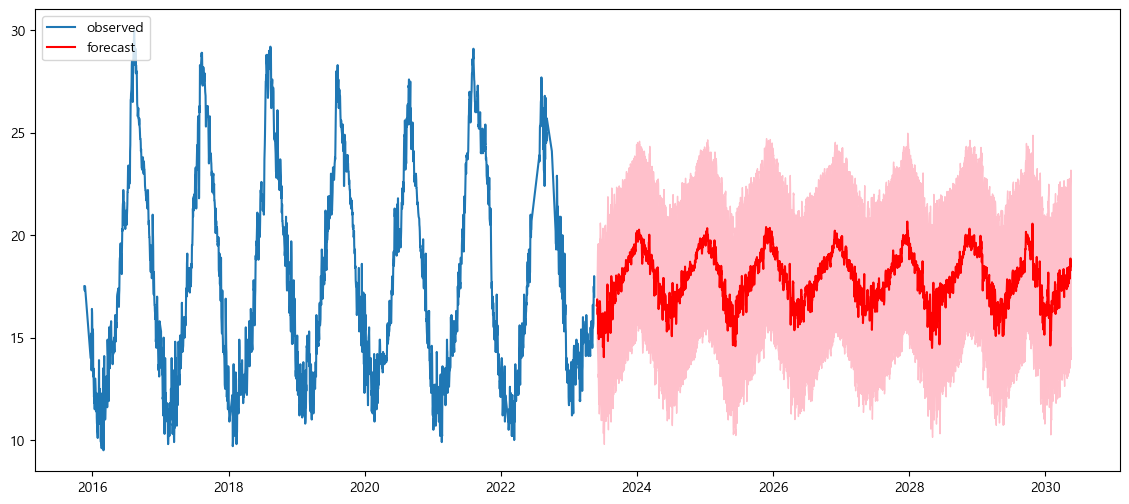

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                 2545
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood               -2707.478
Date:                              Wed, 31 May 2023   AIC                           5436.957
Time:                                      15:20:34   BIC                           5501.217
Sample:                                           0   HQIC                          5460.265
                                             - 2545                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)     -0.0923      0.011     -8.102      0.000      -0.115      -0.070
평균기압(hPa)       

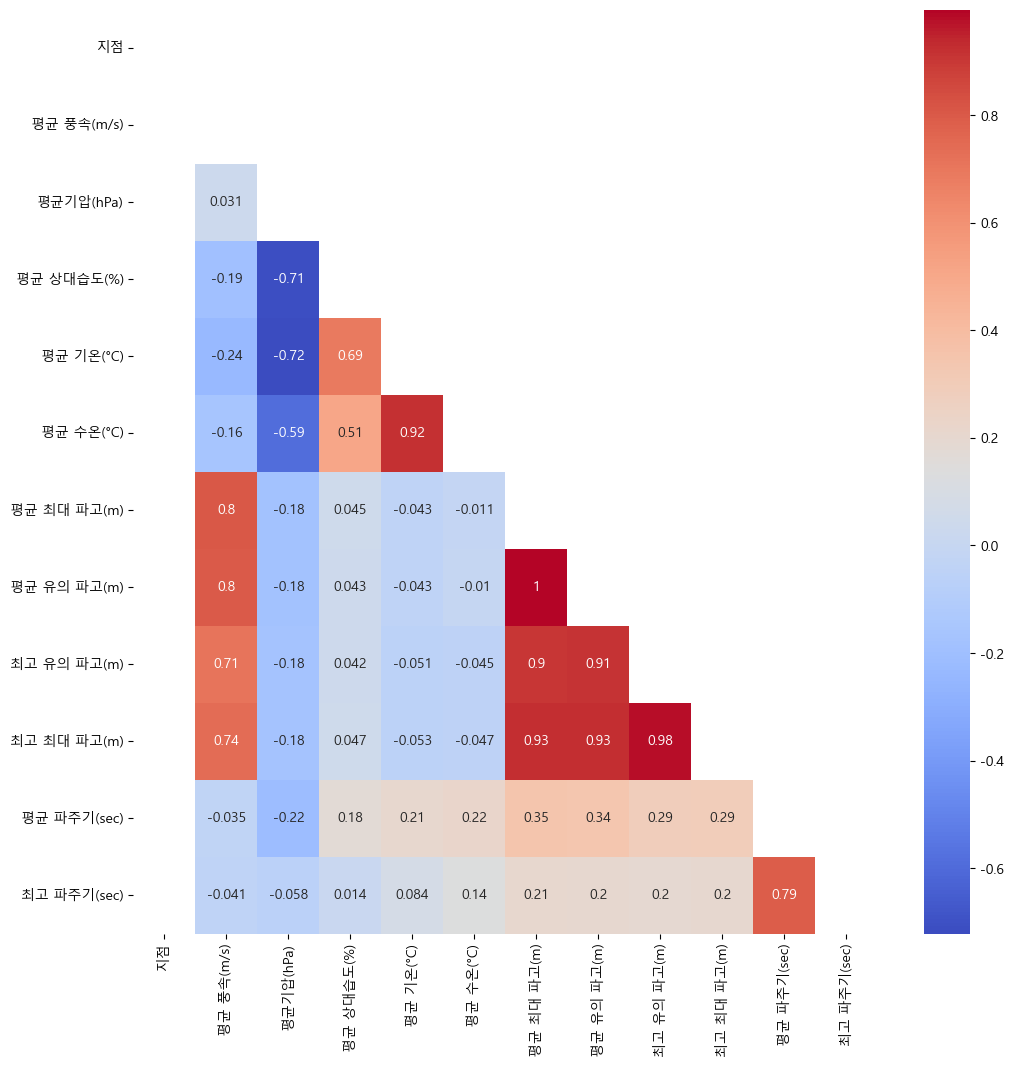

In [2]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230519통영해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)

data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2023-05-31', periods=forecast_steps, freq='d')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index.strftime('%Y-%m-%d')
print(forecast.predicted_mean)

# predicted_mean df 인덱스 추가(아래 mysql 저장 위해)
predicted_mean = pd.DataFrame(forecast.predicted_mean)
predicted_mean.index = forecast_index.strftime('%Y-%m-%d')
print('forecast.predicted_mean',forecast.predicted_mean)

# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True, mask=mask)
plt.show()

forecast.predicted_mean.to_csv('data/stemp_data_day_forecast.csv', index=False)
data.to_csv('data/stemp_data_day_data.csv', index=False)

In [3]:
# data
# forecast.predicted_mean
# forecast_conf_int


import pymysql
from sqlalchemy import create_engine, types

# Establish a connection to MySQL
host = 'localhost'
user = 'root'
password = '1234'
database = 'stemp'

# 인덱스 복구
data = data.reset_index()
forecast_conf_int = forecast_conf_int.reset_index()
predicted_mean = predicted_mean.reset_index()

conn = pymysql.connect(host=host, user=user, password=password, database=database)

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

list1 = [data, predicted_mean, forecast_conf_int]  # 첫 번째 요소들의 리스트
list2 = ['stemprealtongday', 'stempforetongday', 'stempforeconftongday']  # 두 번째 요소들의 리스트

for item1, item2 in zip(list1, list2):
    # 각 요소들을 item1, item2 변수에 할당하여 반복문 실행
    table_name = item2
    dtype = {'일시': types.Date(), '평균 풍속(m/s)': types.Float(), '평균기압(hPa)': types.Float(), '평균 상대습도(%)': types.Float(), '평균 기온(°C)': types.Float(), 
             '평균 수온(°C)': types.Float(), '평균 최대 파고(m)': types.Float(), '평균 유의 파고(m)': types.Float(), '평균 파주기(sec)': types.Float()}
    item1.to_sql(table_name, engine, if_exists='replace', index=False, dtype=dtype)

conn.close()

0       2015-11-01
1       2015-11-18
2       2015-11-19
3       2015-11-20
4       2015-11-21
           ...    
2660    2023-05-14
2661    2023-05-15
2662    2023-05-16
2663    2023-05-17
2664    2023-05-18
Name: 일시, Length: 2665, dtype: object
            평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                      
2015-11-30    7.940000  1022.640000   80.200000  15.740000  17.400000   
2015-12-31    6.460000  1024.990000   62.300000   9.020000  14.880000   
2016-01-31    7.525806  1022.906452   63.000000   5.929032  12.270968   
2016-02-29    7.396552  1023.255172   61.620690   6.803448  11.117241   
2016-03-31    5.322581  1020.970968   70.387097  10.696774  12.929032   
...                ...          ...         ...        ...        ...   
2023-01-31    6.974194  1023.364516   61.612903   6.303226  12.777419   
2023-02-28    5.939286  1024.010714   61.892857   8.696429  13.789286   
2023-03-31    5.151613 

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


PeriodIndex(['2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
             '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04',
             '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10',
             '2024-11', '2024-12', '2025-01', '2025-02', '2025-03', '2025-04',
             '2025-05', '2025-06', '2025-07', '2025-08', '2025-09', '2025-10',
             '2025-11', '2025-12', '2026-01', '2026-02', '2026-03', '2026-04',
             '2026-05', '2026-06', '2026-07', '2026-08', '2026-09', '2026-10',
             '2026-11', '2026-12', '2027-01', '2027-02', '2027-03', '2027-04',
             '2027-05', '2027-06', '2027-07', '2027-08', '2027-09', '2027-10',
             '2027-11', '2027-12', '2028-01', '2028-02', '2028-03', '2028-04',
             '2028-05', '2028-06', '2028-07', '2028-08', '2028-09', '2028-10',
             '2028-11', '2028-12', '2029-01', '2029-02', '2029-03', '2029-04',
             '2029-05', '2029-06', '2029-07', '2029-

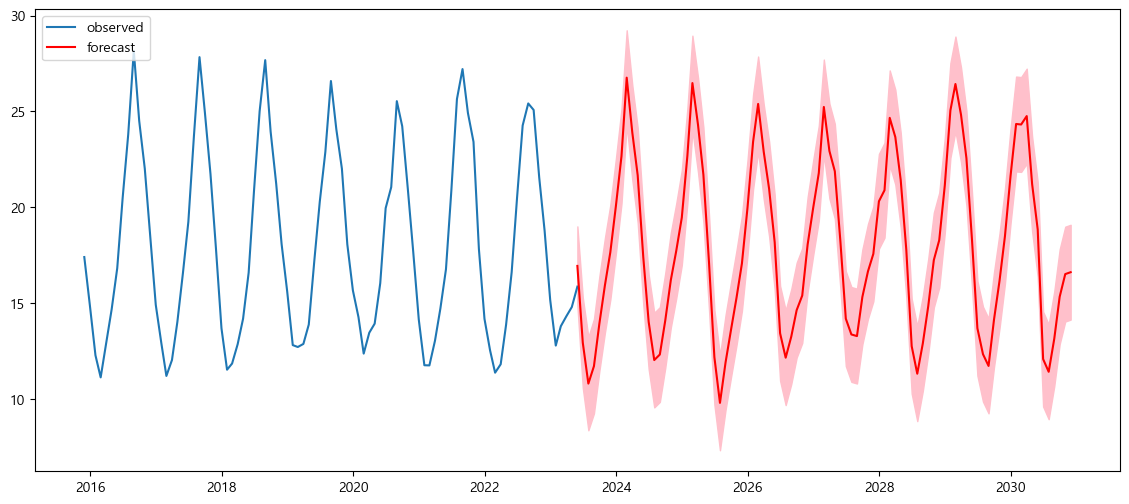

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                   91
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                -124.180
Date:                              Wed, 31 May 2023   AIC                            270.360
Time:                                      15:22:02   BIC                            297.980
Sample:                                  11-30-2015   HQIC                           281.503
                                       - 05-31-2023                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)      0.1806      0.330      0.547      0.584      -0.466       0.828
평균기압(hPa)       

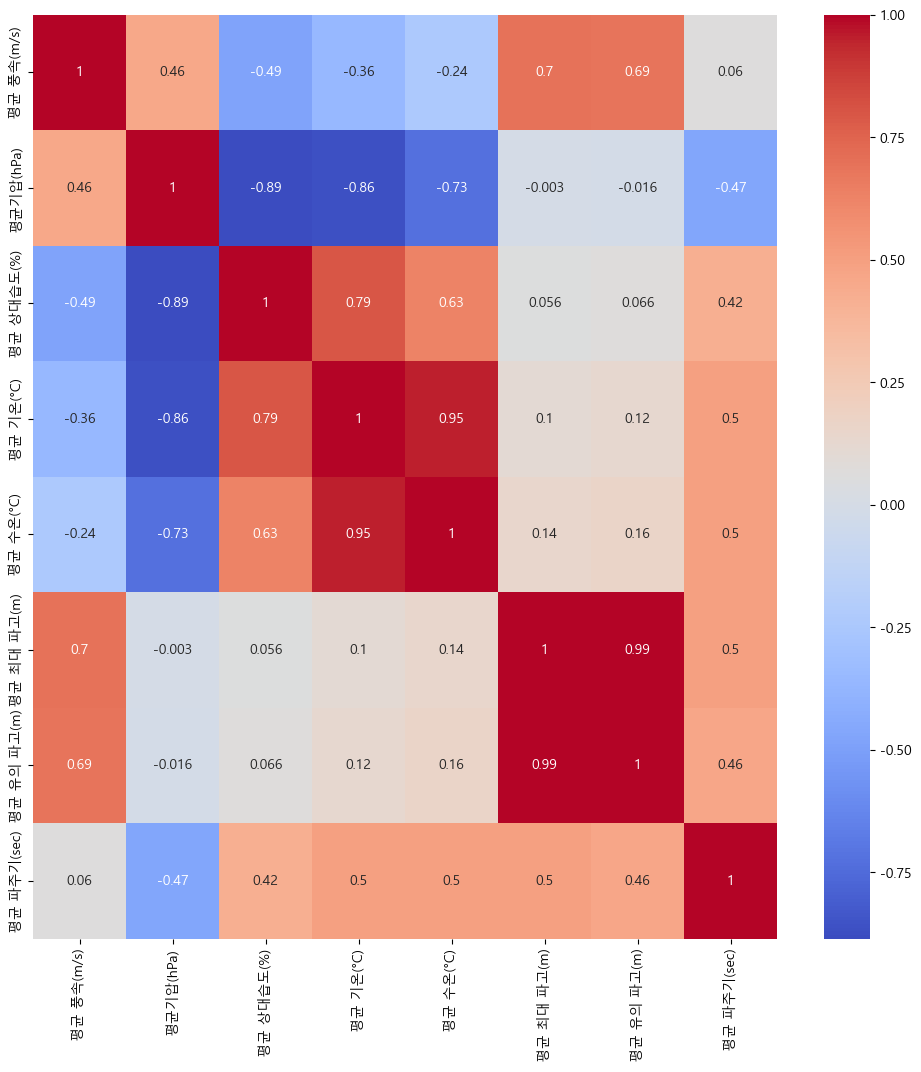

In [4]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230519통영해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)
data=data.set_index(pd.to_datetime(data.일시)) # Date를 인덱스로
data.index = pd.to_datetime(data.index)
data = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 수온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']].resample('M').mean()

print(data)
data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
# data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
# data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2023-05-19', periods=forecast_steps, freq='m')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index.strftime('%Y-%m-%d')
print(forecast.predicted_mean)

# predicted_mean df 인덱스 추가(아래 mysql 저장 위해)
predicted_mean = pd.DataFrame(forecast.predicted_mean)
predicted_mean.index = forecast_index.strftime('%Y-%m-%d')
print('forecast.predicted_mean',forecast.predicted_mean)

# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast.predicted_mean.to_csv('data/stemp_data_month_forecast.csv', index=False)
data.to_csv('data/stemp_data_month_data.csv', index=False)

In [5]:
# data
# forecast.predicted_mean
# forecast_conf_int


import pymysql
from sqlalchemy import create_engine, types

# Establish a connection to MySQL
host = 'localhost'
user = 'root'
password = '1234'
database = 'stemp'

# 인덱스 복구
data = data.reset_index()
forecast_conf_int = forecast_conf_int.reset_index()
predicted_mean = predicted_mean.reset_index()

conn = pymysql.connect(host=host, user=user, password=password, database=database)

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

list1 = [data, predicted_mean, forecast_conf_int]  # 첫 번째 요소들의 리스트
list2 = ['stemprealtongmonth', 'stempforetongmonth', 'stempforeconftongmonth']  # 두 번째 요소들의 리스트

for item1, item2 in zip(list1, list2):
    # 각 요소들을 item1, item2 변수에 할당하여 반복문 실행
    table_name = item2
    dtype = {'일시': types.Date(), '평균 풍속(m/s)': types.Float(), '평균기압(hPa)': types.Float(), '평균 상대습도(%)': types.Float(), '평균 기온(°C)': types.Float(), 
             '평균 수온(°C)': types.Float(), '평균 최대 파고(m)': types.Float(), '평균 유의 파고(m)': types.Float(), '평균 파주기(sec)': types.Float()}
    item1.to_sql(table_name, engine, if_exists='replace', index=False, dtype=dtype)

conn.close()

0       2015-11-01
1       2015-11-18
2       2015-11-19
3       2015-11-20
4       2015-11-21
           ...    
2660    2023-05-14
2661    2023-05-15
2662    2023-05-16
2663    2023-05-17
2664    2023-05-18
Name: 일시, Length: 2665, dtype: object
            평균 풍속(m/s)    평균기압(hPa)  평균 상대습도(%)  평균 기온(°C)  평균 수온(°C)  \
일시                                                                      
2016-12-31    5.942857  1015.892077   75.930362  16.438798  18.377049   
2017-12-31    5.861433  1016.121703   72.096685  15.873352  17.995330   
2018-12-31    5.936963  1015.695690   75.373178  16.113218  18.613218   
2019-12-31    5.815068  1015.346027   72.476712  16.183836  18.290137   
2020-12-31    5.990137  1015.641209   69.719780  15.694780  17.800549   
2021-12-31    6.414835  1015.679121   70.231198  16.504396  18.525000   
2022-12-31    5.869057  1015.762769   68.697183  15.807077  17.838629   

            평균 최대 파고(m)  평균 유의 파고(m)  평균 파주기(sec)  
일시                                         

c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


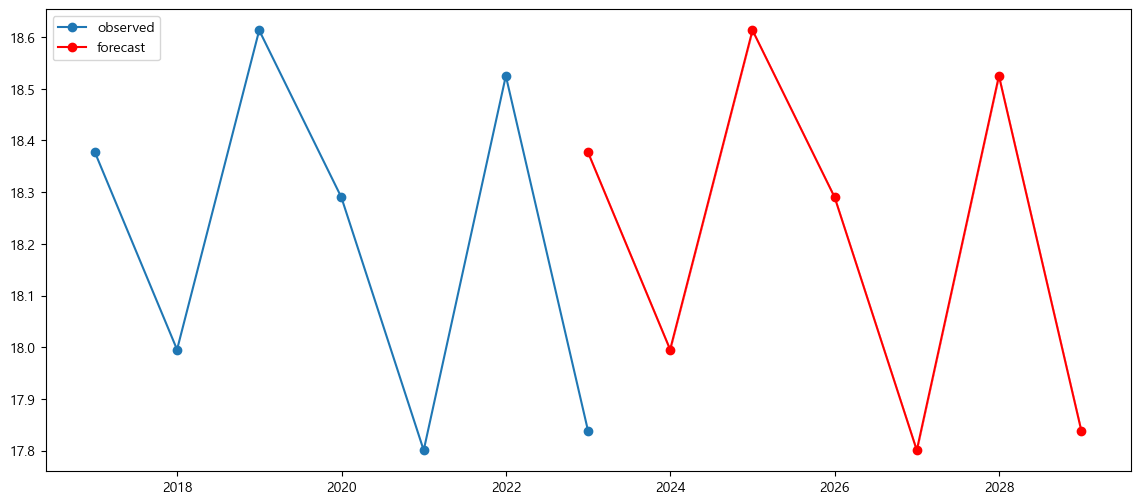

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                    7
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                  73.657
Date:                              Wed, 31 May 2023   AIC                           -125.314
Time:                                      15:22:48   BIC                           -125.909
Sample:                                  12-31-2016   HQIC                          -132.668
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)     -2.2879   7.54e-23  -3.03e+22      0.000      -2.288      -2.288
평균기압(hPa)       

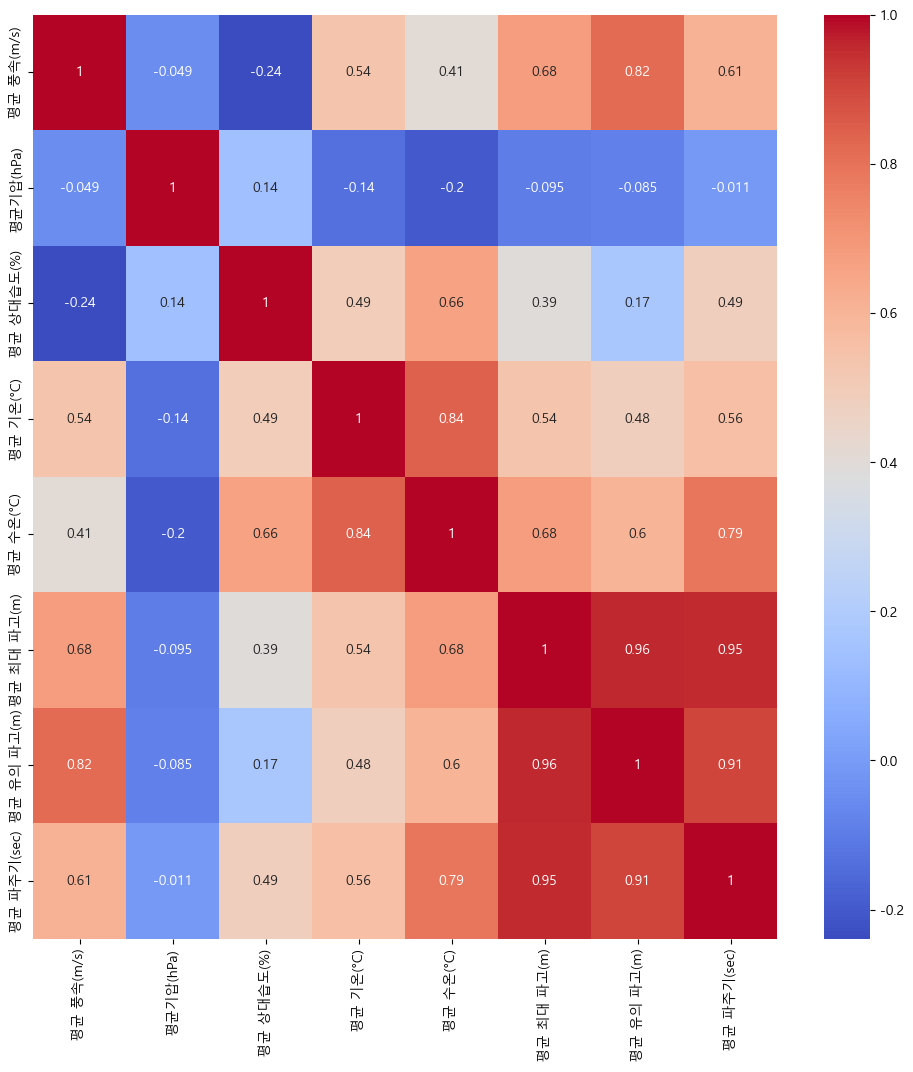

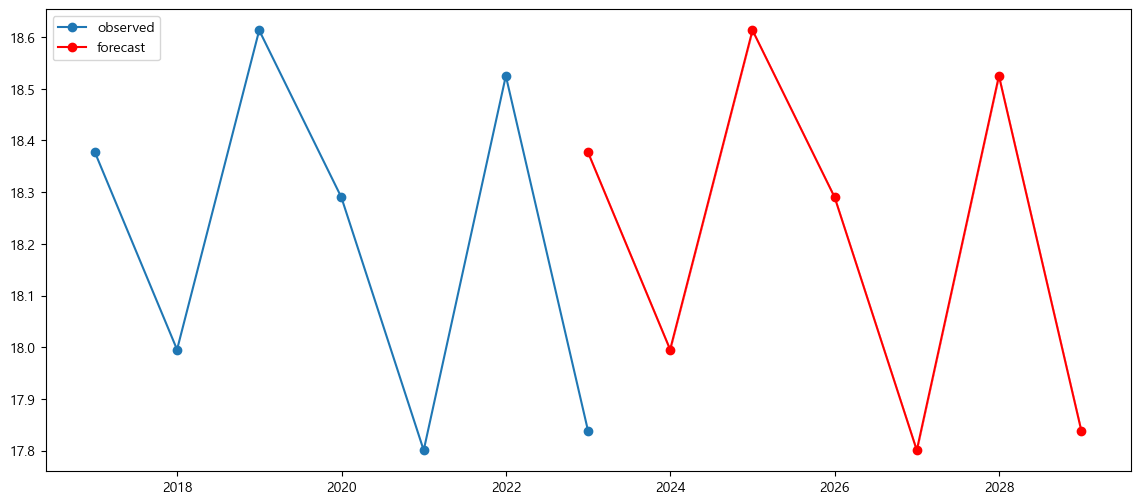

                                      SARIMAX Results                                       
Dep. Variable:                            평균 수온(°C)   No. Observations:                    7
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 18)   Log Likelihood                  73.657
Date:                              Wed, 31 May 2023   AIC                           -125.314
Time:                                      15:22:49   BIC                           -125.909
Sample:                                  12-31-2016   HQIC                          -132.668
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
평균 풍속(m/s)     -2.2879   7.54e-23  -3.03e+22      0.000      -2.288      -2.288
평균기압(hPa)       

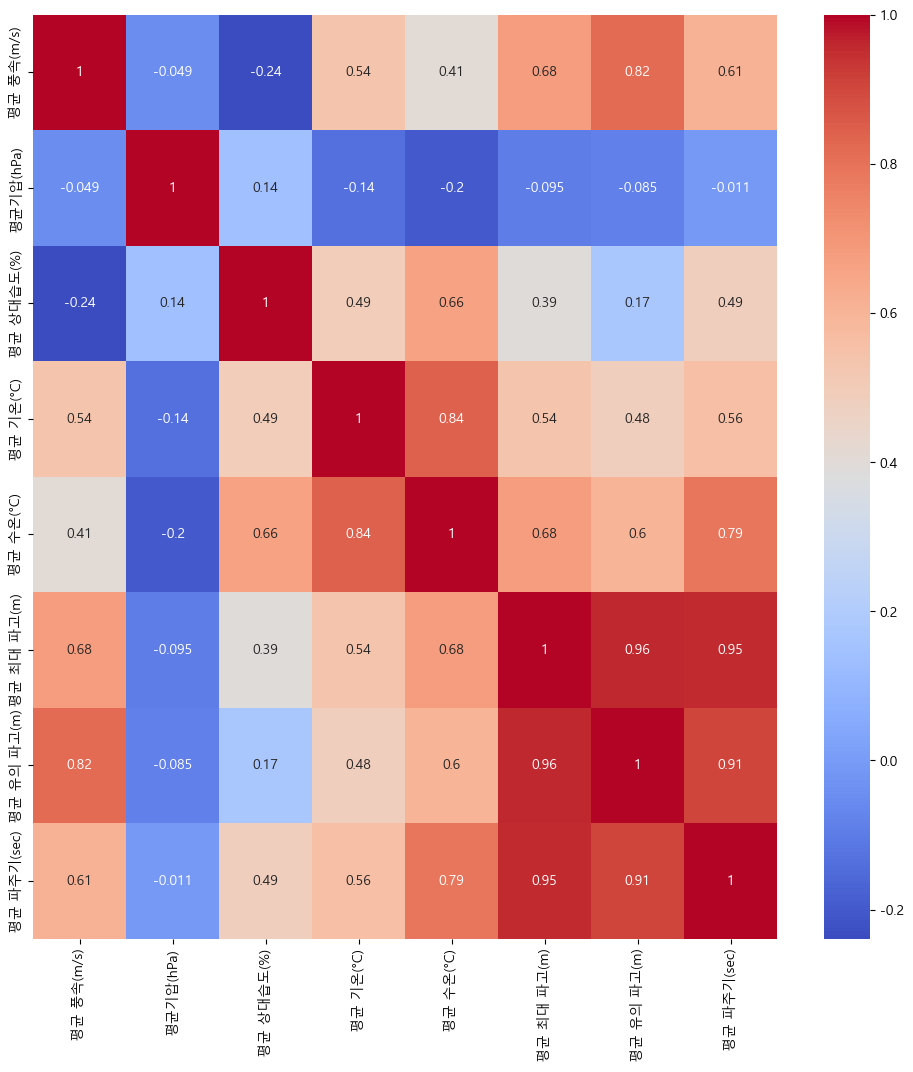

In [6]:
# csv 파일을 읽어옵니다.
from sklearn.preprocessing import StandardScaler,robust_scale
import pandas as pd
# 데이터를 불러옵니다.
data = pd.read_csv('data/20230519통영해양데이터.csv', parse_dates=True, encoding='utf-8')
date = data['일시']
date=date.dropna()
print(date)
data=data.set_index(pd.to_datetime(data.일시)) # Date를 인덱스로
data.index = pd.to_datetime(data.index)
data = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 수온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']].resample('Y').mean()
data = data.iloc[1:-1]

print(data)
data = data.sort_values('일시', ascending=True)
data.loc[data['평균 수온(°C)'] == 0, '평균 수온(°C)'] = np.nan
data=data.dropna()

data = data.reset_index()  # 인덱스를 열로 변환
# data = data.drop(['index'],axis=1)

data = data.rename(columns={'일시': 'date'})  # 열 이름 변경
# data['date'] = pd.to_datetime(data['date'], format="%Y.%m")  # 날짜 형식으로 변환
data = data.rename(columns={'date': '일시'})
data = data.set_index('일시')  # 다시 인덱스로 설정

print(data)
# 스케일링
# 스케일링
# 인덱스를 PeriodIndex로 변환합니다.
# data = data.iloc[::-1]
# data.index = pd.date_range(start='2013-01-06', periods=len(data), freq='d')
# exog를 다시 정의합니다.
exog = data[['평균 풍속(m/s)','평균기압(hPa)','평균 상대습도(%)','평균 기온(°C)','평균 최대 파고(m)','평균 유의 파고(m)','평균 파주기(sec)']]
print(exog)
# 시계열 모델을 학습합니다.
model = SARIMAX(data['평균 수온(°C)'], order=(1, 0, 0), seasonal_order=(1, 0, 1, 18), exog=exog)

results = model.fit(disp=False)

# 예측 기간을 설정합니다.
forecast_steps = len(data)

# 예측 결과와 신뢰 구간을 얻습니다.
forecast = results.get_forecast(steps=forecast_steps, exog=exog[-forecast_steps:])
forecast_conf_int = forecast.conf_int()
# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
from numpy import timedelta64

# 예측 결과의 인덱스를 원본 데이터와 동일한 시간 범위로 설정합니다.
# forecast_index = pd.period_range(start=data.index[-1] + timedelta64(1, 'M'), periods=forecast_steps, freq='M')

# forecast_index = pd.period_range(data.index[-1] + 1, periods=forecast_steps, freq='M')
forecast_index = pd.period_range(start='2022-05-19', periods=forecast_steps, freq='y')
print(forecast_index)

forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index.strftime('%Y-%m-%d')
print(forecast.predicted_mean)

# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed', marker='o', linestyle='-')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r', marker='o', linestyle='-')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(y_pred)
y_pred.to_csv('forecast_results(stemp).csv', index=True, index_label='date')

# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast_index = pd.period_range(start='2022-05-19', periods=forecast_steps, freq='y')
forecast_index_timestamp = forecast_index.to_timestamp()  # PeriodIndex를 Timestamp로 변환
forecast.predicted_mean.index = forecast_index
forecast_conf_int.index = forecast_index


# 결과를 시각화합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['평균 수온(°C)'], label='observed', marker='o', linestyle='-')
plt.plot(forecast_index, forecast.predicted_mean, label='forecast', color='r', marker='o', linestyle='-')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.legend(loc='upper left')
plt.show()

print(results.summary())

# 예측 오차 계산
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = data['평균 수온(°C)'][-forecast_steps:]
y_pred = forecast.predicted_mean
rmse = np.sqrt(mean_squared_error(y_true, y_pred))



# 예측 오차 출력
print('RMSE:', rmse)
import seaborn as sns

corr = data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

forecast.predicted_mean.to_csv('data/stemp_data_month_forecast.csv', index=False)
data.to_csv('data/stemp_data_month_data.csv', index=False)

In [7]:
# data
# forecast.predicted_mean
# forecast_conf_int


import pymysql
from sqlalchemy import create_engine, types

# Establish a connection to MySQL
host = 'localhost'
user = 'root'
password = '1234'
database = 'stemp'

# 인덱스 복구
data = data.reset_index()
forecast_conf_int = forecast_conf_int.reset_index()
forecast.predicted_mean = forecast.predicted_mean.reset_index()

conn = pymysql.connect(host=host, user=user, password=password, database=database)

# Create a SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

list1 = [data, forecast.predicted_mean, forecast_conf_int]  # 첫 번째 요소들의 리스트
list2 = ['stemprealtongyear', 'stempforetongyear', 'stempforeconftongyear']  # 두 번째 요소들의 리스트

for item1, item2 in zip(list1, list2):
    # 각 요소들을 item1, item2 변수에 할당하여 반복문 실행
    table_name = item2
    dtype = {'일시': types.Date(), '평균 풍속(m/s)': types.Float(), '평균기압(hPa)': types.Float(), '평균 상대습도(%)': types.Float(), '평균 기온(°C)': types.Float(), 
             '평균 수온(°C)': types.Float(), '평균 최대 파고(m)': types.Float(), '평균 유의 파고(m)': types.Float(), '평균 파주기(sec)': types.Float()}
    item1.to_sql(table_name, engine, if_exists='replace', index=False, dtype=dtype)

conn.close()